## Ejercicio 5.35
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_5.35.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

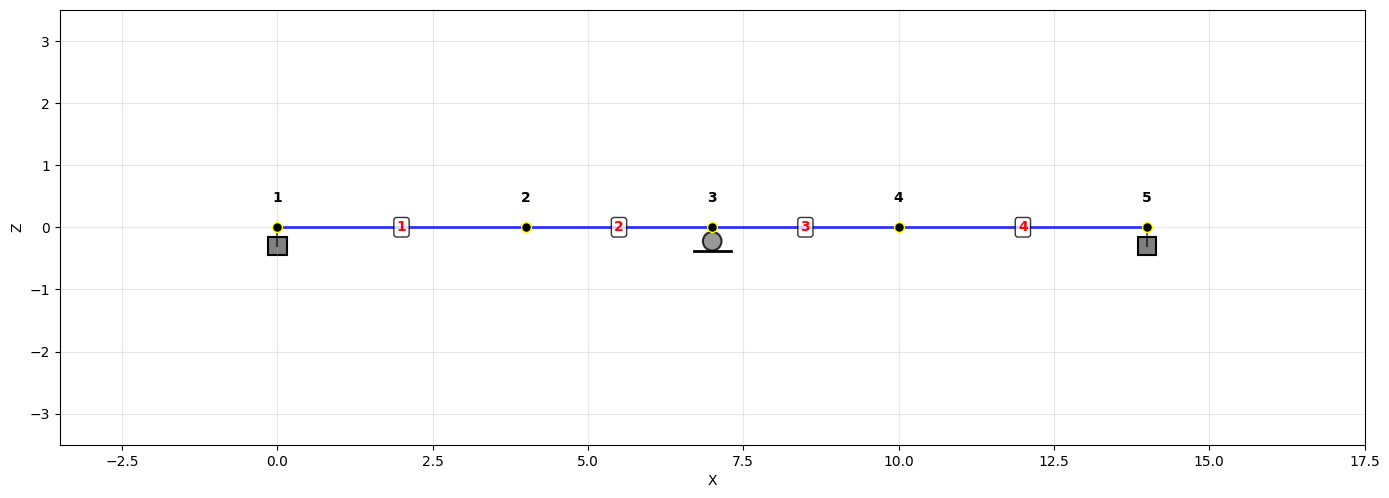

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 1
I = 90 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=4, z=0)
system.defineNode(3, x=7, z=0)
system.defineNode(4, x=10, z=0)
system.defineNode(5, x=14, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(5, ux=True, uz=True, ry=True)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I*1.25)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)
system.defineElement(4, 4, 5, A=A, E=E, I=I*1.25)

# Asignación de Cargas
system.assignJoint.force(2, fx=0, fz=-250, my=0)
system.assignJoint.force(4, fx=0, fz=-250, my=0)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 5
Número de elementos: 4
Grados de libertad totales: 15
Grados de libertad restringidos (desplazamientos conocidos): 7 de 15
GL restringidos: [ 0  1  2  7 12 13 14]
Grados de libertad libres (fuerzas conocidas): 8 de 15
GL libres: [ 3  4  5  6  8  9 10 11]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (8x8):
  |         3 |          4 |          5 |          6 |          8 |          9 |         10 |         11 |

  |  116666667 |          0 |          0 |  -66666667 |          0 |          0 |          0 |          0 |
  |          0 |      12219 |       3562 |          0 |      12000 |          0 |          0 |          0 |
  |          0

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 4.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.1250e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 50000000.000 |      0.000 |      0.000 | -50000000.000 |      0.000 |      0.000 |
  |      0.000 |   4218.750 |   8437.500 |      0.000 |  -4218.750 |   8437.50

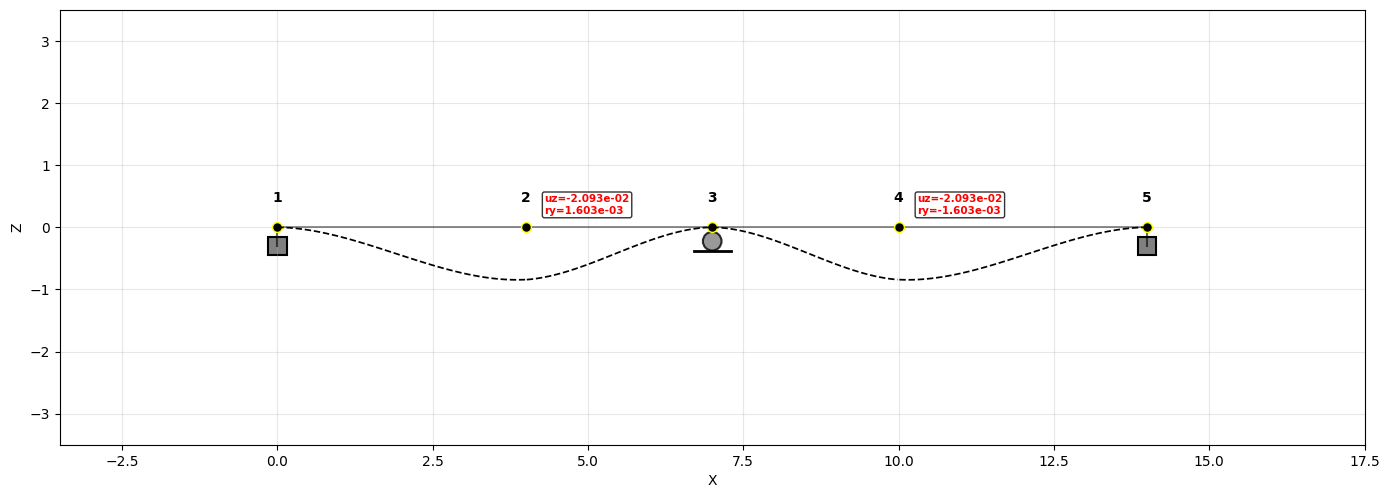

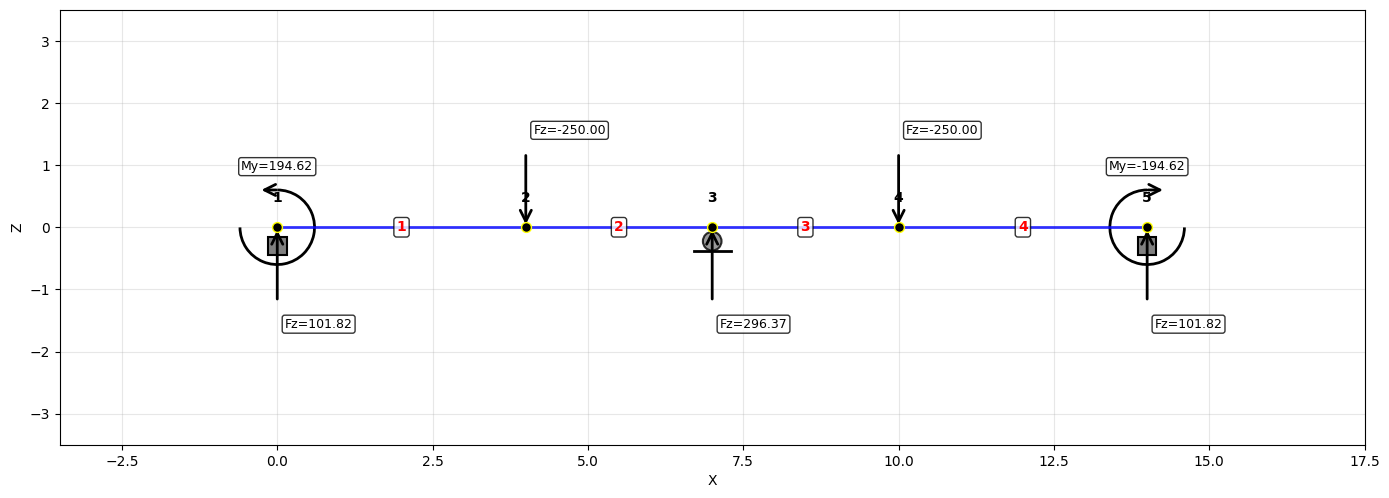

In [5]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.05)
plotter.showReactions()